In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("repos_1000.csv")

In [3]:
df["createdAt"] = pd.to_datetime(df["createdAt"], utc=True).dt.tz_convert(None)
df["updatedAt"] = pd.to_datetime(df["updatedAt"], utc=True).dt.tz_convert(None)
today = datetime.datetime.utcnow()

## **Análise**

#### RQ01

In [4]:
df["repo_age"] = (today - df["createdAt"]).dt.days / 365
median_repo_age = df["repo_age"].median()
median_repo_age

8.297260273972604

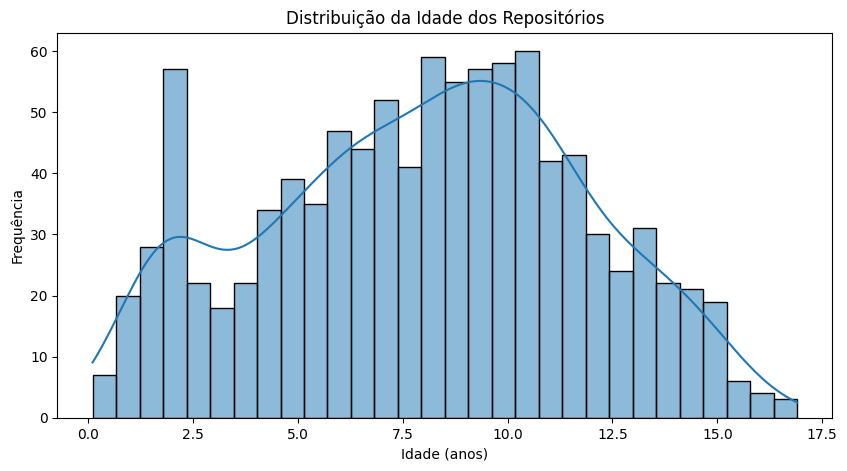

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df["repo_age"], bins=30, kde=True)
plt.title("Distribuição da Idade dos Repositórios")
plt.xlabel("Idade (anos)")
plt.ylabel("Frequência")
plt.show()

#### RQ02

In [6]:
median_pull_requests = df["pullRequests"].median()
median_pull_requests

619.5

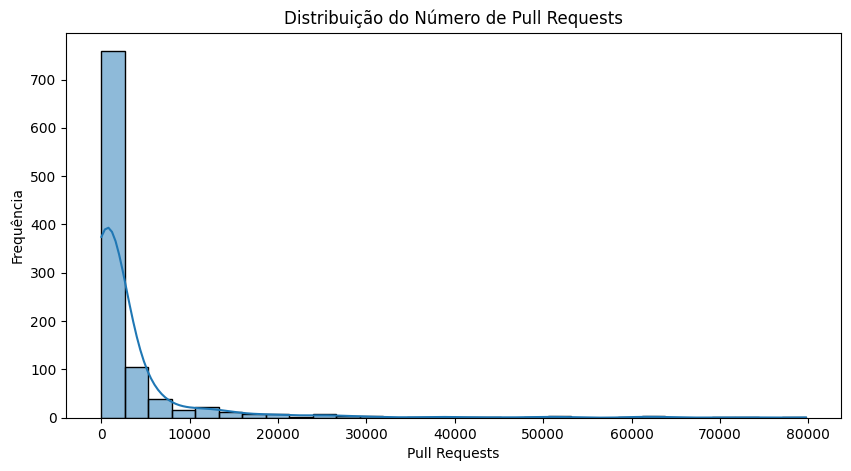

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(df["pullRequests"], bins=30, kde=True)
plt.title("Distribuição do Número de Pull Requests")
plt.xlabel("Pull Requests")
plt.ylabel("Frequência")
plt.show()

#### RQ03

In [8]:
median_releases = df["releases"].median()
median_releases

33.0

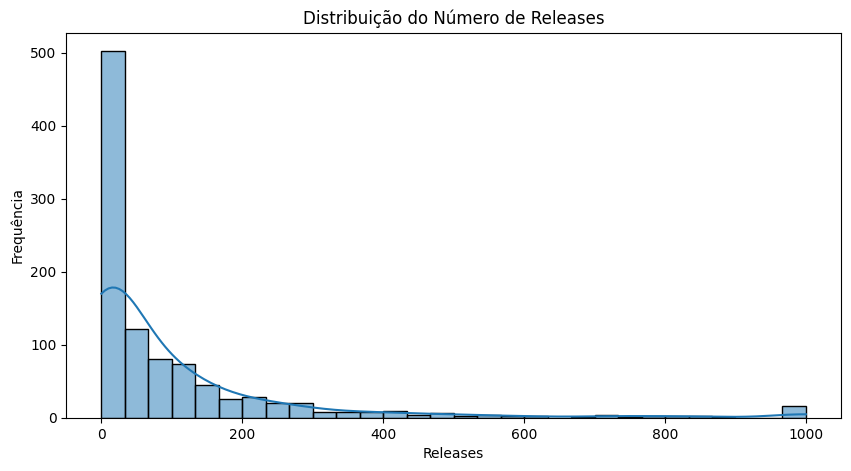

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df["releases"], bins=30, kde=True)
plt.title("Distribuição do Número de Releases")
plt.xlabel("Releases")
plt.ylabel("Frequência")
plt.show()

#### RQ04

In [25]:
df["days_since_update"] = (today - df["updatedAt"]).dt.days
median_days_since_update = df["days_since_update"].median()
median_days_since_update

6.0

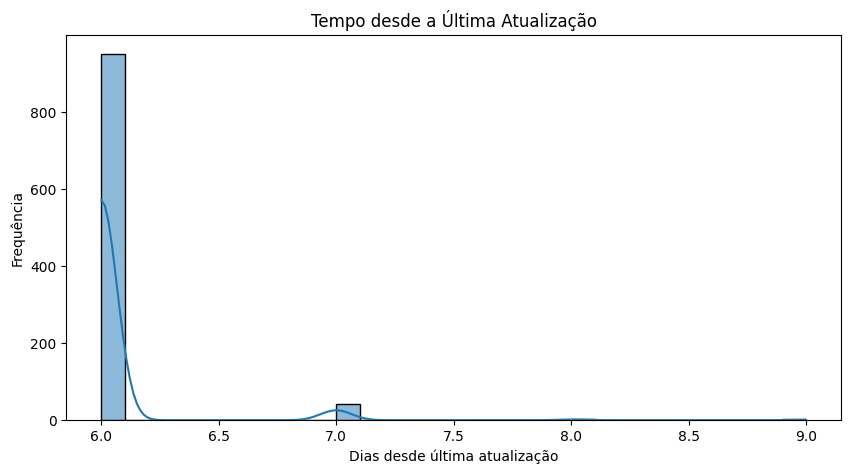

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(df["days_since_update"], bins=30, kde=True)
plt.title("Tempo desde a Última Atualização")
plt.xlabel("Dias desde última atualização")
plt.ylabel("Frequência")
plt.show()

#### RQ05

In [12]:
language_counts = df["primaryLanguage"].value_counts()

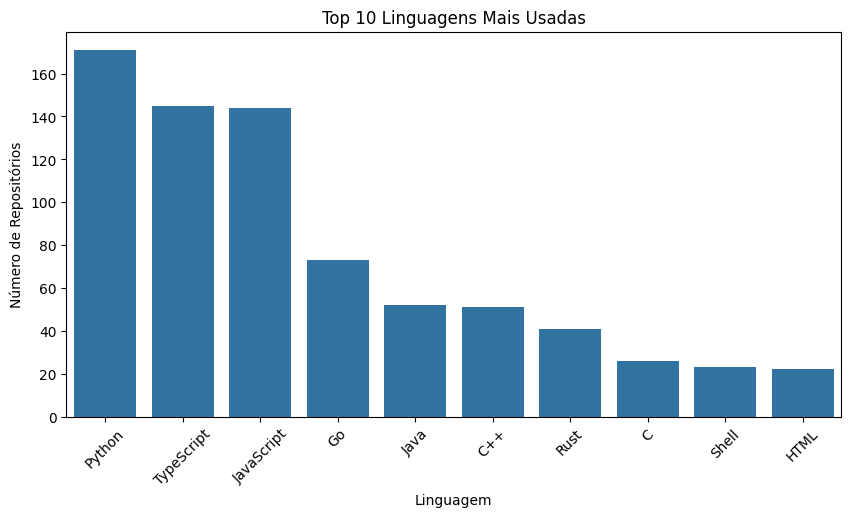

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x=language_counts.index[:10], y=language_counts.values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Linguagens Mais Usadas")
plt.xlabel("Linguagem")
plt.ylabel("Número de Repositórios")
plt.show()

#### RQ06

In [14]:
df["issue_close_ratio"] = df["closedIssues"] / df["issues"]
median_issue_close_ratio = df["issue_close_ratio"].median()
median_issue_close_ratio

0.8639280110579797

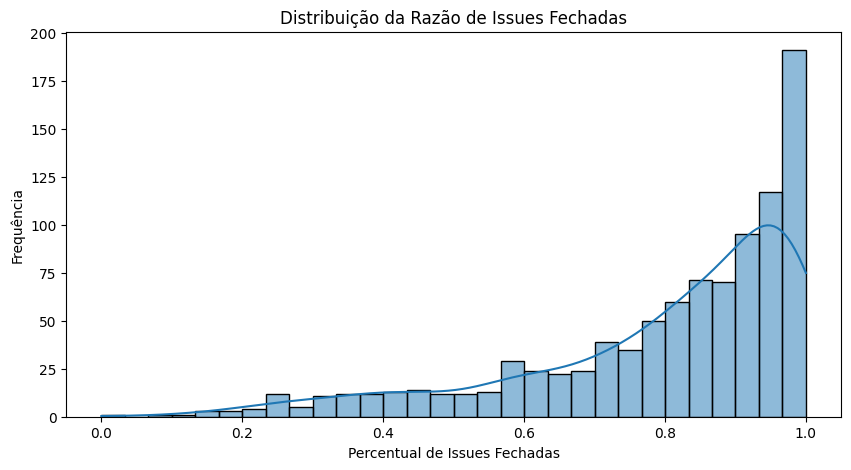

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df["issue_close_ratio"], bins=30, kde=True)
plt.title("Distribuição da Razão de Issues Fechadas")
plt.xlabel("Percentual de Issues Fechadas")
plt.ylabel("Frequência")
plt.show()

#### Todas as analises

In [23]:
# Analises
analysis_results = {
    "RQ01: Idade do repositório (anos)": median_repo_age,
    "RQ02: Pull Requests aceitas (mediana)": median_pull_requests,
    "RQ03: Releases (mediana)": median_releases,
    "RQ04: Dias desde última atualização (mediana)": median_days_since_update,
    "RQ06: Percentual de issues fechadas (mediana)": median_issue_close_ratio,
}

print("### Resultados da Análise ###")
for key, value in analysis_results.items():
    print(f"{key}: {value}")

### Resultados da Análise ###
RQ01: Idade do repositório (anos): 8.297260273972604
RQ02: Pull Requests aceitas (mediana): 619.5
RQ03: Releases (mediana): 33.0
RQ04: Dias desde última atualização (mediana): 6.0
RQ06: Percentual de issues fechadas (mediana): 0.8639280110579797


### RQ07

In [17]:
top_languages = language_counts.index[:10]

df_top_languages = df[df["primaryLanguage"].isin(top_languages)]


In [19]:
language_medians = df_top_languages.groupby("primaryLanguage").agg({
    "pullRequests": "median",
    "releases": "median",
    "days_since_update": "median"
}).reset_index()

language_medians.columns = ["Linguagem", "Mediana Pull Requests", "Mediana Releases", "Mediana Dias desde Atualização"]

language_medians


,Linguagem,Mediana Pull Requests,Mediana Releases,Mediana Dias desde Atualização
0,C,82.5,21.5,6.0
1,C++,932.0,57.0,6.0
2,Go,1378.0,101.0,6.0
3,HTML,212.5,0.0,6.0
4,Java,527.0,38.5,6.0
5,JavaScript,552.0,34.0,6.0
6,Python,477.0,19.0,6.0
7,Rust,2007.0,75.0,6.0
8,Shell,331.0,1.0,6.0
9,TypeScript,1995.0,141.0,6.0


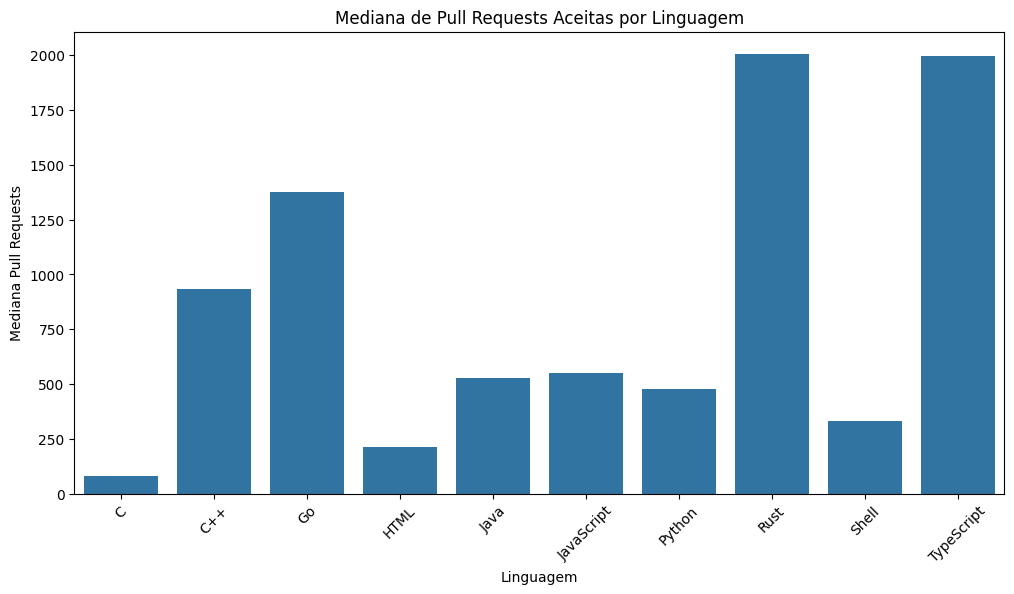

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x="Linguagem", y="Mediana Pull Requests", data=language_medians)
plt.xticks(rotation=45)
plt.title("Mediana de Pull Requests Aceitas por Linguagem")
plt.show()


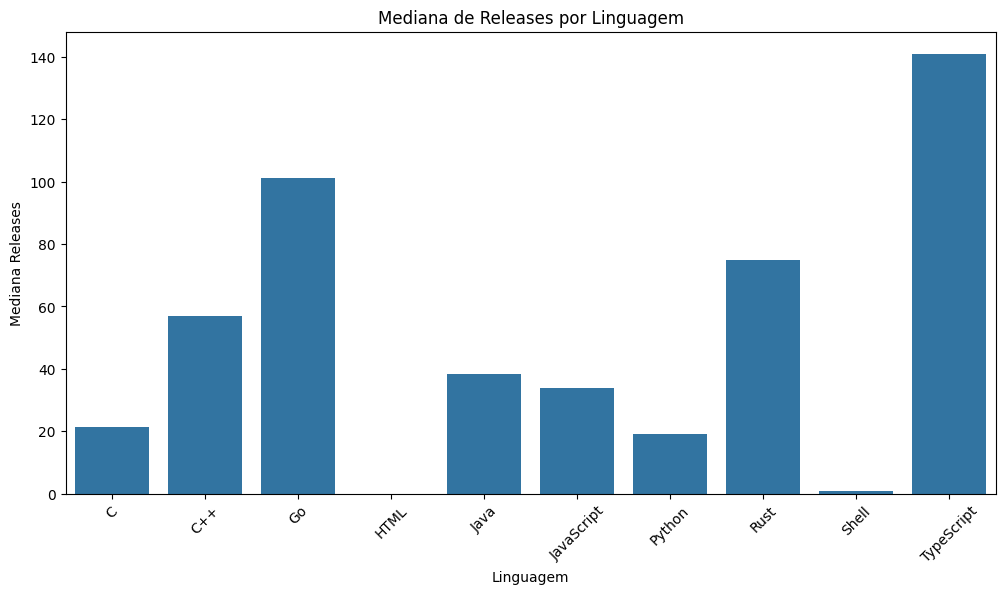

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x="Linguagem", y="Mediana Releases", data=language_medians)
plt.xticks(rotation=45)
plt.title("Mediana de Releases por Linguagem")
plt.show()


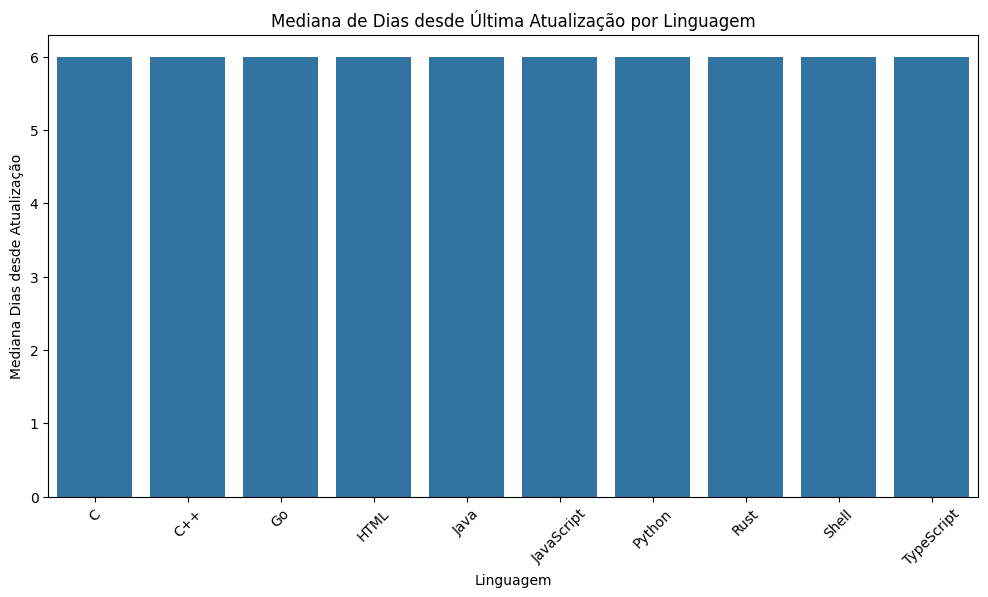

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x="Linguagem", y="Mediana Dias desde Atualização", data=language_medians)
plt.xticks(rotation=45)
plt.title("Mediana de Dias desde Última Atualização por Linguagem")
plt.show()
